## Zadanie domowe: morfologiczna gra w życie – John Conway

### Wykorzystanie operacji LUT w przekształceniu trafi, nie trafi
  - Szybszą metodą wykonania transformacji trafi, nie trafi może być operacja LUT.
  - Technika polega na zakodowaniu wyników wszystkich interesujących  konfiguracji, a następnie podczas przetwarzania wykorzystania operacji LUT.
  - Dla otoczenia 3x3 możliwe jest 512 różnych konfiguracji.
  - Aby praktycznie zrealizować operacje, każdej konfiguracji należy nadać unikalny indeks. Jedną z możliwości jest pomnożenie elementu strukturalnego przez macierz (mnożenie odpowiednich elementów):
  ```
  [[1, 8,  64],
   [ 2, 16, 128],
   [ 4, 32, 256]]
  ```
  Przykładowo elementowi:
  ```
  [[1, 1, 0],
   [ 1, 0, 1],
   [ 1, 0, 1]]
  ```
  odpowiada liczba: 1(1) + 2(1) + 4(1) + 8(1) + 128(1) + 256(1) = 399.
  
### Przykład działania metody – detekcja punktów końcowych na obrazie.
  - założenie: punkt końcowy to punkt, który ma dokładnie jednego sąsiada,
  - zdefiniuj funkcję, która jako argument pobiera otoczenie, a zwraca 0 lub 1 w zależności od tego, czy rozpatrywany punkt jest końcowy np. dla sąsiedztwa 3×3 punkt będzie końcowy, jeżeli jest zapalony i ma tylko jednego sąsiada (czyli suma pikseli jest równa 2).
  - wygeneruj przekodowanie LUT.
  - wczytaj obraz szkielet.bmp (należy go przekształcić, aby uzyskać dwuwymiarową tablicę o wartościach 0-1). Wykorzystując wygenerowane przekodowanie LUT wykonaj detekcję zakończeń. Wyświetl obraz oryginalny i po przekodowaniu LUT.


In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

if not os.path.exists("szkielet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/10_Morphology/szkielet.bmp --no-check-certificate

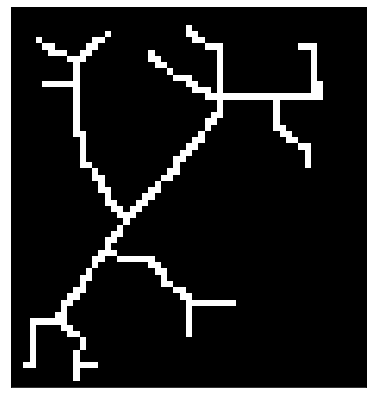

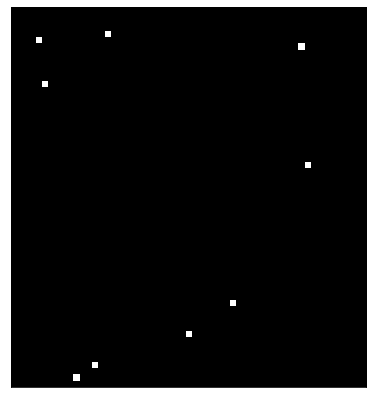

In [2]:
I = cv2.imread('szkielet.bmp') 
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
I = (I > 128) * 1

plt.figure(figsize=(7,7))
plt.imshow(I, cmap ="gray")
plt.xticks([]), plt.yticks([])
plt.show()

arr = np.array([
    [1, 8, 64],
    [2, 16, 128],
    [4, 32, 256]
])

lut = np.zeros(512)
good_value = np.array([1, 2, 4, 8, 32, 64, 128, 256]) + 16
for val in good_value:
    lut[val] = 1
    

def detect(surr):
    arg = np.sum(arr*surr)
    return lut[int(arg)]

new_I = np.zeros_like(I)
for i in range(1, I.shape[0]-1):
    for j in range(1, I.shape[1]-1):
        new_I[i, j] = detect(I[i-1:i+2, j-1:j+2])
        
plt.figure(figsize=(7,7))
plt.imshow(new_I, cmap ="gray")
plt.xticks([]), plt.yticks([])
plt.show()

### Gra w życie

Reguły gry w życie:
  - każdy piksel biały, który ma dwóch lub trzech sąsiadów (białych) przeżywa,
  - każdy piksel biały, który ma 0,1 lub więcej niż trzech sąsiadów (białych) nie przeżywa (głód lub przeludnienie),
  - jeżeli jakieś pole (czarne) sąsiaduje dokładnie z trzema pikselami białymi, to na tym polu ,,rodzi'' się nowy piksel biały.

Zadanie:
  - za pomocą mechanizmu LUT (opisanego wcześniej) należy zaimplementować morfologiczną gre w życie,
  - najważniejszym elementem jest funkcja opisująca reguły gry,
  - symulacje należny przeprowadzić dla plansz plansza1 oraz plansza2 (zob. komórka poniżej),
  - dobrze jest wykonać kilka iteracji – zobaczyć jak zmienia się kształt,
  - inne ciekawe kształty do znalezienia w internecie.

In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import imageio
from IPython.display import Image

In [4]:
plansza1 = np.array([
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	1,	0,	0,	1,	0,	0,	0],
    [0,	0,	0,	1,	1,	1,	1,	0,	0,	0],
    [0,	0,	1,	0,	0,	0,	0,	1,	0,	0],
    [0,	0,	1,	0,	1,	1,	0,	1,	0,	0],
    [0,	0,	1,	0,	0,	0,	0,	1,	0,	0],
    [0,	0,	0,	1,	1,	1,	1,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0]], np.uint8)

plansza2 = np.array([
    [0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1],
    [0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1],
    [1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0]], np.uint8)

plansza3 = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
], np.uint8)

In [5]:
lut = np.zeros(512)

values = [1, 2, 4, 8, 32, 64, 128, 256]
for j1 in range(8):
    for j2 in range(j1+1, 8):
        lut[values[j1] + values[j2]] = 1
        for j3 in range(j2+1, 8):
            lut[values[j1] + values[j2] + values[j3]] = 1
            lut[values[j1] + values[j2] + values[j3] + 16] = 1
            
def make_frame(I):
    new_I = np.zeros((I.shape[0]+2, I.shape[1]+2))
    new_I[1:-1, 1:-1] = I
    
    new_I[0, 1:-1] = I[-1, :]
    new_I[-1, 1:-1] = I[0, :]
    new_I[1:-1, 0] = I[:, -1]
    new_I[1:-1, -1] = I[:, 0]
    
    new_I[0,0] = I[-1,-1]
    new_I[-1,0] = I[0,-1]
    new_I[0,-1] = I[-1,0]
    new_I[-1,-1] = I[0,0]
    
    return new_I
    
    

def remove_frame(I):
    return I[1:-1, 1:-1]
            
def step(I):
    I = make_frame(I)
    new_I = np.zeros_like(I)
    for i in range(1, I.shape[0]-1):
        for j in range(1, I.shape[1]-1):
            new_I[i, j] = detect(I[i-1:i+2, j-1:j+2])
    return remove_frame(new_I)

def game_of_life(I, k=10):
    filenames = []
    plt.figure(figsize=(5,5))
    plt.imshow(I, cmap ="gray")
    plt.xticks([]), plt.yticks([])
    
    filename = "start.png"
    filenames.append(filename)
    
    plt.savefig(filename)
    plt.close()
    
    while (k > 0):
        I = step(I)
        plt.figure(figsize=(5,5))
        plt.imshow(I, cmap ="gray")
        plt.xticks([]), plt.yticks([])
        filename = "file" + str(k) + ".png"
        filenames.append(filename)
        plt.savefig(filename)
        plt.close()
        k -= 1
        
    with imageio.get_writer("game_gif.gif", mode="I", duration=0.3) as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)
            
    for filename in filenames:
        os.remove(filename)

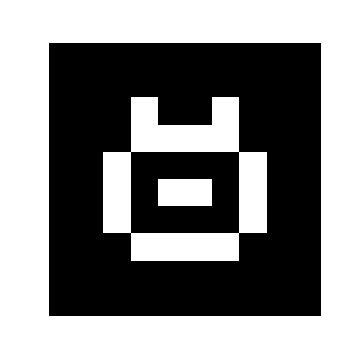

In [10]:
game_of_life(plansza1, k=100)
Image("game_gif.gif")

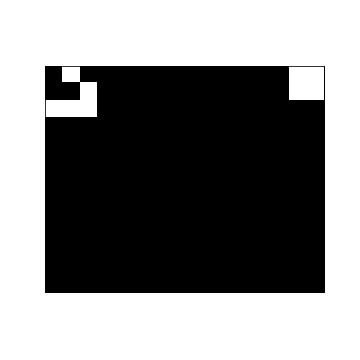

In [7]:
game_of_life(plansza2, k=100)
Image("game_gif.gif") 

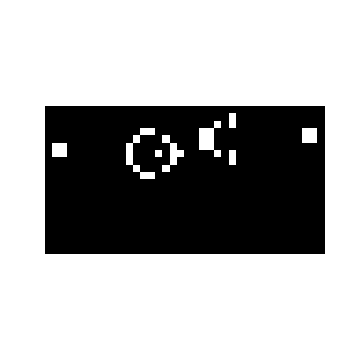

In [9]:
game_of_life(plansza3, k=100)
Image("game_gif.gif")